In [1]:
using LinearAlgebra
using FFTW
using ToeplitzMatrices
using SpecialMatrices
using Plots

In [20]:
#the input data
#T from a to b with δt as step
a = -4.0
δt = 0.005
b = 7
T = a:δt:b
Y = T.^3 - 5*T.^2 -T
N = length(Y)
L = floor(Int, N/2)
M = 4
##############################################################################################
#the algorithm

    #Hankel(first col, lasr row)
Y1 = Hankel(Y[1:N-L-1] ,Y[N-L-1:N-1])
Y2 = Hankel(Y[2:N-L] ,Y[N-L:N])
s = svd(I*Y1)                           
Ze = inv(Diagonal(s.S))*s.U'*Y2*s.V
z = reverse((eigen(Ze).values), dims = 1) #it doesn't sort!!
S = log.(z)/δt
zm = z[1:M]
#building up the rectangular vandermond matrix (it could be a contribution)
v = Vandermonde(zm)
vn = ceil(Int, N/M)
V = v
for i in 2:vn
    V = [V diagm(zm).^i*v]
end

Z = V[:, 1:N]
b = Z'\Y
#parameters done!
Ypred = real.(b'*Z)


1×2201 Matrix{Float64}:
 -143.624  -141.864  -140.117  …  89.2501  90.7611  92.2849  89.2502

In [21]:
S

1100-element Vector{ComplexF64}:
 0.0010628102352859775 + 0.0im
 -5.307836077334504e-8 + 0.00106275742844755im
 -5.307836077334504e-8 - 0.00106275742844755im
  -0.00106270407862819 + 0.0im
   -21.067899798114322 + 140.9604947970603im
   -21.067899798114322 - 140.9604947970603im
    -304.6075056353171 + 0.0im
    -310.9899347521759 + 0.0im
    -271.6300493521817 + 132.3535879377456im
    -271.6300493521817 - 132.3535879377456im
   -334.09115297635316 + 33.010403924284944im
   -334.09115297635316 - 33.010403924284944im
   -308.21781884820797 + 116.4632576589963im
                       ⋮
    -311.1789359370301 + 496.68903482922354im
    -311.1789359370301 - 496.68903482922354im
   -352.37509407549476 + 617.0038845984101im
   -352.37509407549476 - 617.0038845984101im
     -325.859676992873 + 559.4502711392753im
     -325.859676992873 - 559.4502711392753im
   -336.48751152188885 + 614.6642042414566im
   -336.48751152188885 - 614.6642042414566im
   -225.68337966301772 + 473.4464290092297im


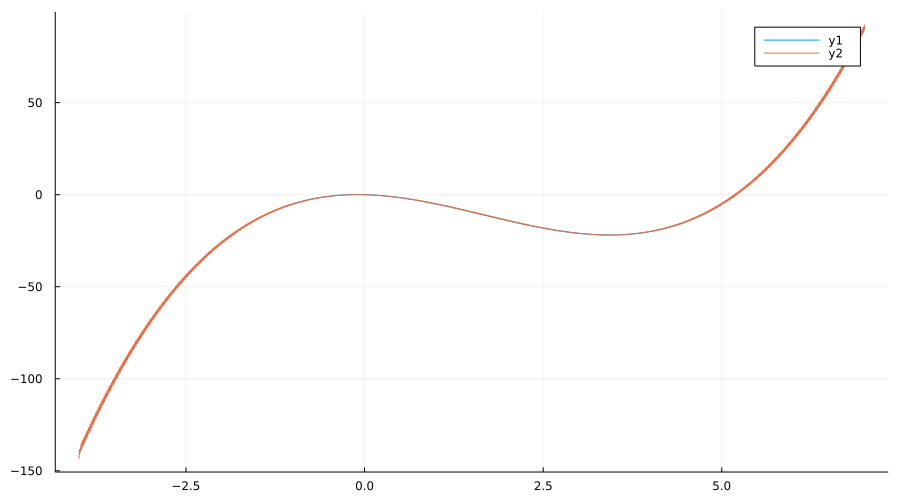

In [23]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))

In [82]:
#sin function with low frequency
a = -2.0
δt = 0.01
b = 2
T = a:δt:b
Y = 100*sin.(2*π*T)
N = length(Y)
L = floor(Int, N/2)
M = 100        #that was the problem!                     
##############################################################################################
#the algorithm

    #Hankel(first col, lasr row)
Y1 = Hankel(Y[1:N-L-1] ,Y[N-L-1:N-1])
Y2 = Hankel(Y[2:N-L] ,Y[N-L:N])
s = svd(I*Y1)                           
Ze = inv(Diagonal(s.S))*s.U'*Y2*s.V

z = reverse((eigen(Ze).values), dims = 1) #it doesn't sort!!
#z = eigen(Ze).values


S = log.(z)/δt
zm = z[1:M]
#building up the rectangular vandermond matrix (it could be a contribution)
v = Vandermonde(zm)
vn = ceil(Int, N/M)
V = v
for i in 2:vn
    V = [V diagm(zm).^i*v]
end

Z = V[:, 1:N]
b = Z'\Y
#parameters done!
Ypred = real.(b'*Z)


1×401 Matrix{Float64}:
 -4.19617e-5  6.27904  6.2667  8.33909  …  -1.94508  4.30666  13.6904

In [83]:
S

200-element Vector{ComplexF64}:
 -6.643990912991175e-14 + 6.283185307179596im
 -6.643990912991175e-14 - 6.283185307179596im
    -44.768383507067846 + 101.49614470374432im
    -44.768383507067846 - 101.49614470374432im
    -151.22150407742922 + 15.723977538372258im
    -151.22150407742922 - 15.723977538372258im
     -151.1794196501523 + 34.80415801351821im
     -151.1794196501523 - 34.80415801351821im
    -148.01119061506571 + 59.43727704554493im
    -148.01119061506571 - 59.43727704554493im
     -35.82541535655835 + 130.49498259478747im
     -35.82541535655835 - 130.49498259478747im
    -162.83555970868255 + 36.699961050735396im
                        ⋮
     -144.3358898901763 + 291.75827095156694im
     -144.3358898901763 - 291.75827095156694im
    -146.26391178641825 + 314.1592653589793im
    -124.54127884573714 + 274.02441039328966im
    -124.54127884573714 - 274.02441039328966im
     -117.0698973376777 + 314.1592653589793im
     -89.12747569420672 + 253.61336155192im
     -89.1274

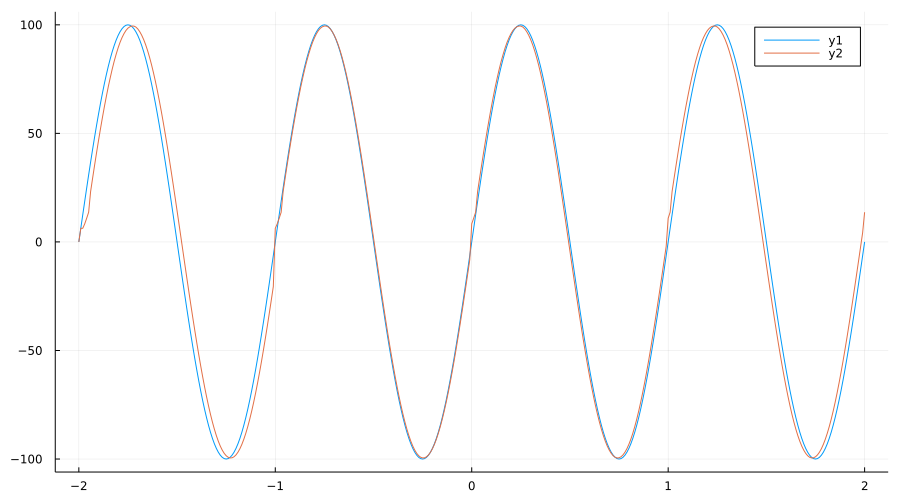

In [84]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))

In [124]:
#sin function with high frequency
a = -2.0
δt = 0.005
b = 2
T = a:δt:b
Y = 100*sin.(2*π*10*T)
N = length(Y)
L = floor(Int, N/2)
M = 201        #that was the problem!    try 195 and 205!                 
##############################################################################################
#the algorithm

    #Hankel(first col, lasr row)
Y1 = Hankel(Y[1:N-L-1] ,Y[N-L-1:N-1])
Y2 = Hankel(Y[2:N-L] ,Y[N-L:N])
s = svd(I*Y1)                           
Ze = inv(Diagonal(s.S))*s.U'*Y2*s.V

z = reverse((eigen(Ze).values), dims = 1) #it doesn't sort!!
#z = eigen(Ze).values


S = log.(z)/δt
zm = z[1:M]
#building up the rectangular vandermond matrix (it could be a contribution)
v = Vandermonde(zm)
vn = ceil(Int, N/M)
V = v
for i in 2:vn
    V = [V diagm(zm).^i*v]
end

Z = V[:, 1:N]
b = Z'\Y
#parameters done!
Ypred = real.(b'*Z)


1×801 Matrix{Float64}:
 -2.86673e-9  30.9017  44.8401  66.1529  …  -51.1191  -24.5226  1.87177

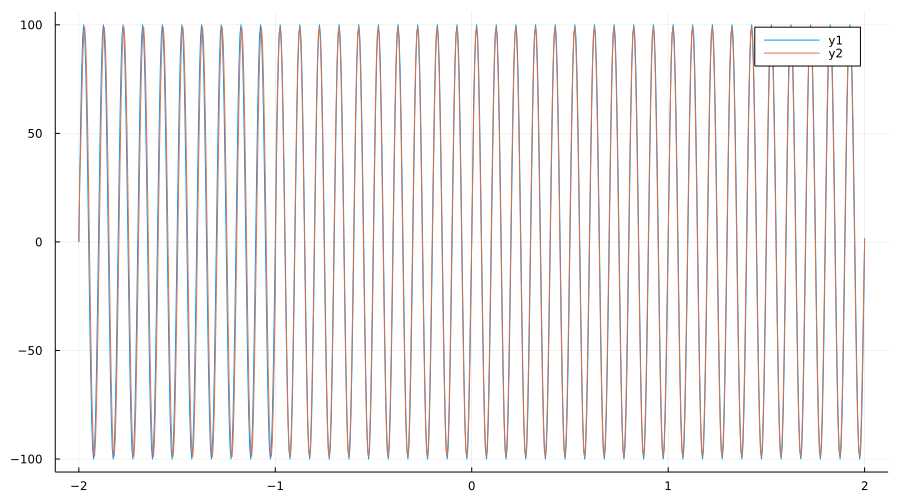

In [125]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))

In [174]:
# test with normal


#the input data
#T from a to b with δt as step
a = -4.0
δt = 0.005
b = 4
T = a:δt:b
Y = 1/sqrt(2π)*exp.(-(T.^2)/2)
N = length(Y)
L = floor(Int, N/2)
#whatch out this parameter
M = 9
##############################################################################################
#the algorithm

    #Hankel(first col, lasr row)
Y1 = Hankel(Y[1:N-L-1] ,Y[N-L-1:N-1])
Y2 = Hankel(Y[2:N-L] ,Y[N-L:N])
s = svd(pinv(I(N-L-1)Y1))                           #assuming svd transform of a matrix is unique!(but it could be a problem!)
Ze = diagm(s.S)*s.Vt*Y2*s.U
z = eigen(Ze).values
S = log.(z)/δt
zm = z[end-(M-1):end]
#building up the rectangular vandermond matrix (it could be a contribution)
v = Vandermonde(zm)
vn = ceil(Int, N/M)
V = v
for i in 2:vn
    V = [V diagm(zm).^i*v]
end

Z = V[:, 1:N]
b = Z'\Y
#parameters done!
Ypred = real.(b'*Z)


1×1601 Matrix{Float64}:
 0.0432307  0.0291542  0.0179796  …  0.00808579  0.0158818  0.0259941

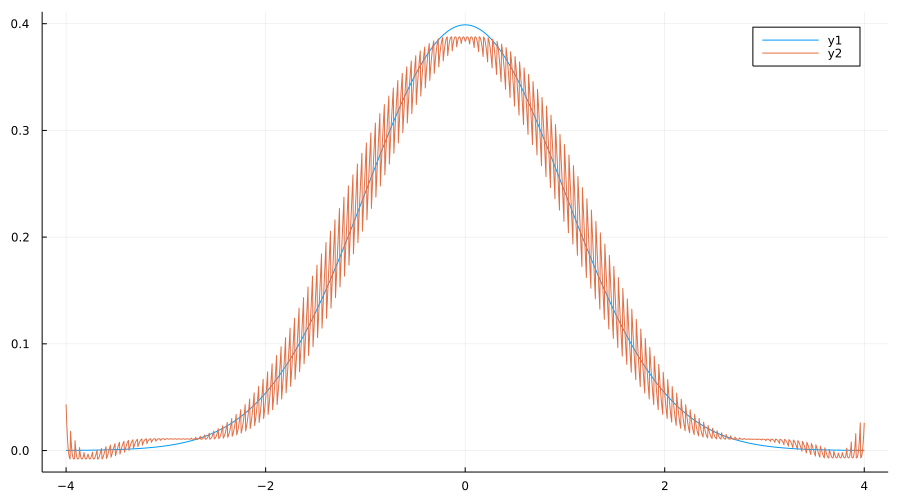

In [175]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))